<a href="https://colab.research.google.com/github/kingketan9/DeepLearningLabs/blob/main/Ass03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create a single layer neural network to classify the self generated random data.

Epoch 0, Loss: 1.4812121391296387
Epoch 10, Loss: 1.2475500106811523
Epoch 20, Loss: 1.0938918590545654
Epoch 30, Loss: 0.9927651882171631
Epoch 40, Loss: 0.9261594414710999
Epoch 50, Loss: 0.8822566270828247
Epoch 60, Loss: 0.8532964587211609
Epoch 70, Loss: 0.8341787457466125
Epoch 80, Loss: 0.8215492367744446
Epoch 90, Loss: 0.8131999969482422


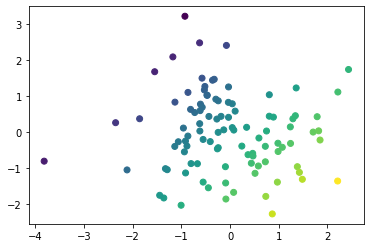

In [11]:
import torch
import matplotlib.pyplot as plt

x = torch.randn(100, 2)
y = torch.randn(100, 1)

class SingleLayerNet(torch.nn.Module):
    def __init__(self):
        super(SingleLayerNet, self).__init__()
        self.linear = torch.nn.Linear(2, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = SingleLayerNet()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):

    y_pred = model(x)

    loss = criterion(y_pred, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

plt.scatter(x[:, 0], x[:, 1], c=y_pred.detach().numpy())
plt.show()

2.	Study the single layer neural network for different Learning rates

Learning rate: 0.9
Training accuracy: 99.17%
Test accuracy: 93.33%

Learning rate: 0.1
Training accuracy: 100.00%
Test accuracy: 90.00%



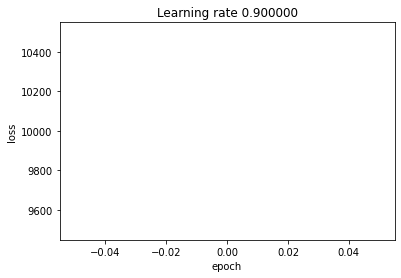

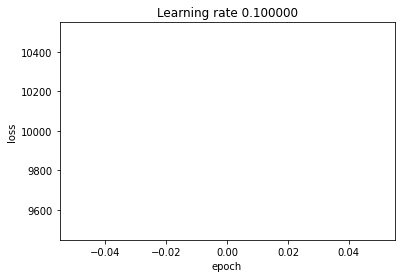

<Figure size 432x288 with 0 Axes>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(4, 3)
    def forward(self, x):
        x = self.fc(x)
        return x

net = Net()

learning_rates = [0.9, 0.1]
for lr in learning_rates:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)
    
    for epoch in range(10000):
        optimizer.zero_grad()
        output = net(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        
    print("Learning rate: {}".format(lr))
    print("Training accuracy: {:.2f}%".format(100*(torch.argmax(net(X_train), dim=1) == y_train).sum().item()/len(y_train)))
    print("Test accuracy: {:.2f}%\n".format(100*(torch.argmax(net(X_test), dim=1) == y_test).sum().item()/len(y_test)))

plt.plot(epoch)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rates[0]))
plt.show()

plt.plot(epoch)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rates[1]))
plt.show()

3. Create a Deep Multi Layer Neural Network to classify self generated random data.

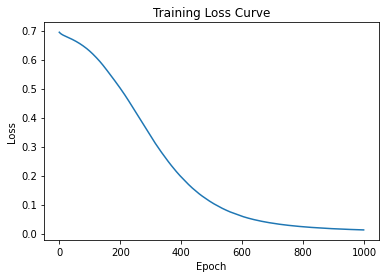

In [35]:
import torch
import matplotlib.pyplot as plt

inputs = torch.randn(100, 10)
targets = torch.randint(0, 2, (100,))

model = torch.nn.Sequential(
    torch.nn.Linear(10, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 1),
    torch.nn.Sigmoid(),
)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets.float().view(-1, 1))
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()